<a href="https://colab.research.google.com/github/himanshukumar8/ML_LAB_Assignment_1/blob/main/ML_LAB_ASSIGNMENT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **LAB ASSIGNMENT 1**  
**Name -Himanshu Kumar**

**Roll No. - MCS24016**

**Question: Consider any database of your choice and implement the simple linear regression model. Also evaluate your model using Repeated Holdout and k-fold cross-validation techniques.
Also, analyse the results obtained from your implemented model and the outputs obtained using the inbuilt function.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Load the dataset
#https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
df = pd.read_csv(url)

# Display the first few rows of the dataset
print(df.head())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


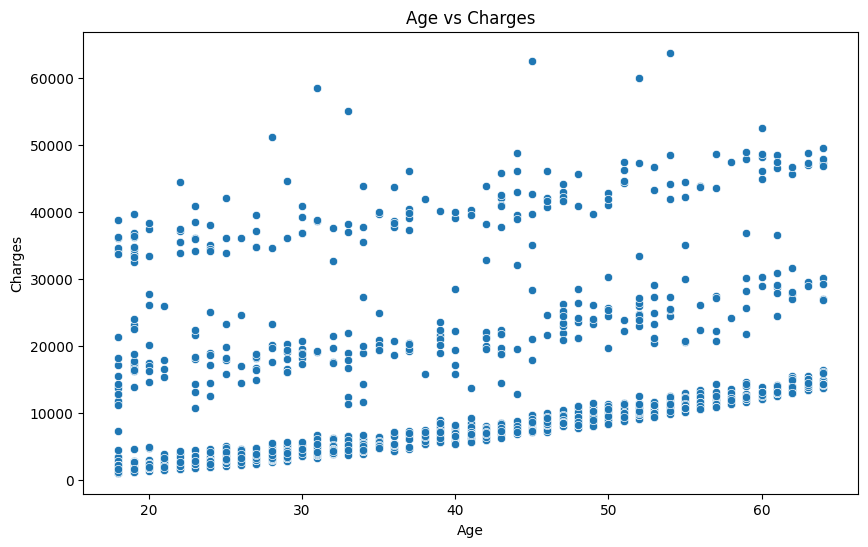

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Define predictor and response variables
X = df[['age']]
y = df['charges']

# Visualize the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=df)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges')
plt.show()


Mean Squared Error: 133440978.61376347
R^2 Score: 0.08940589967885804


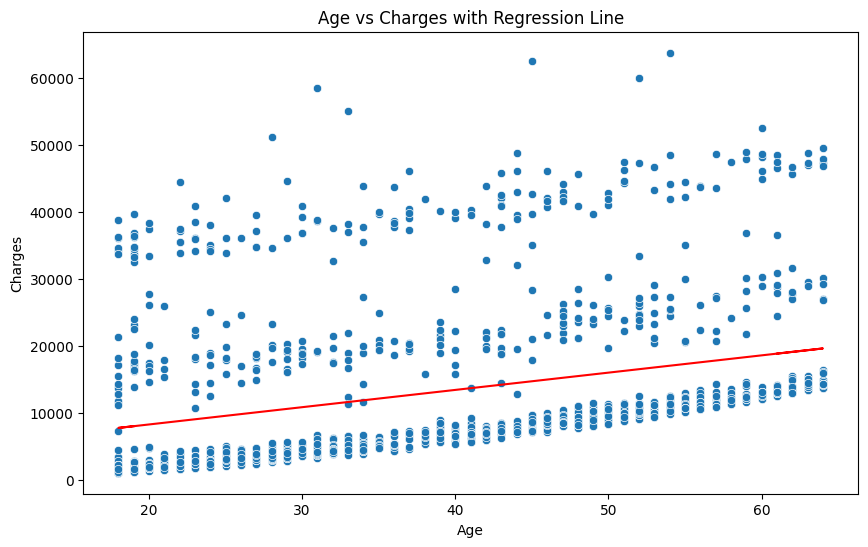

In [ ]:
# Create the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predicting
y_pred = model.predict(X)

# Calculate Mean Squared Error and R^2 Score
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plot the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=df)
plt.plot(X, y_pred, color='red')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges with Regression Line')
plt.show()


Average MSE from Repeated Holdout: 139177315.87669927
Average R^2 from Repeated Holdout: 0.06803965279746703


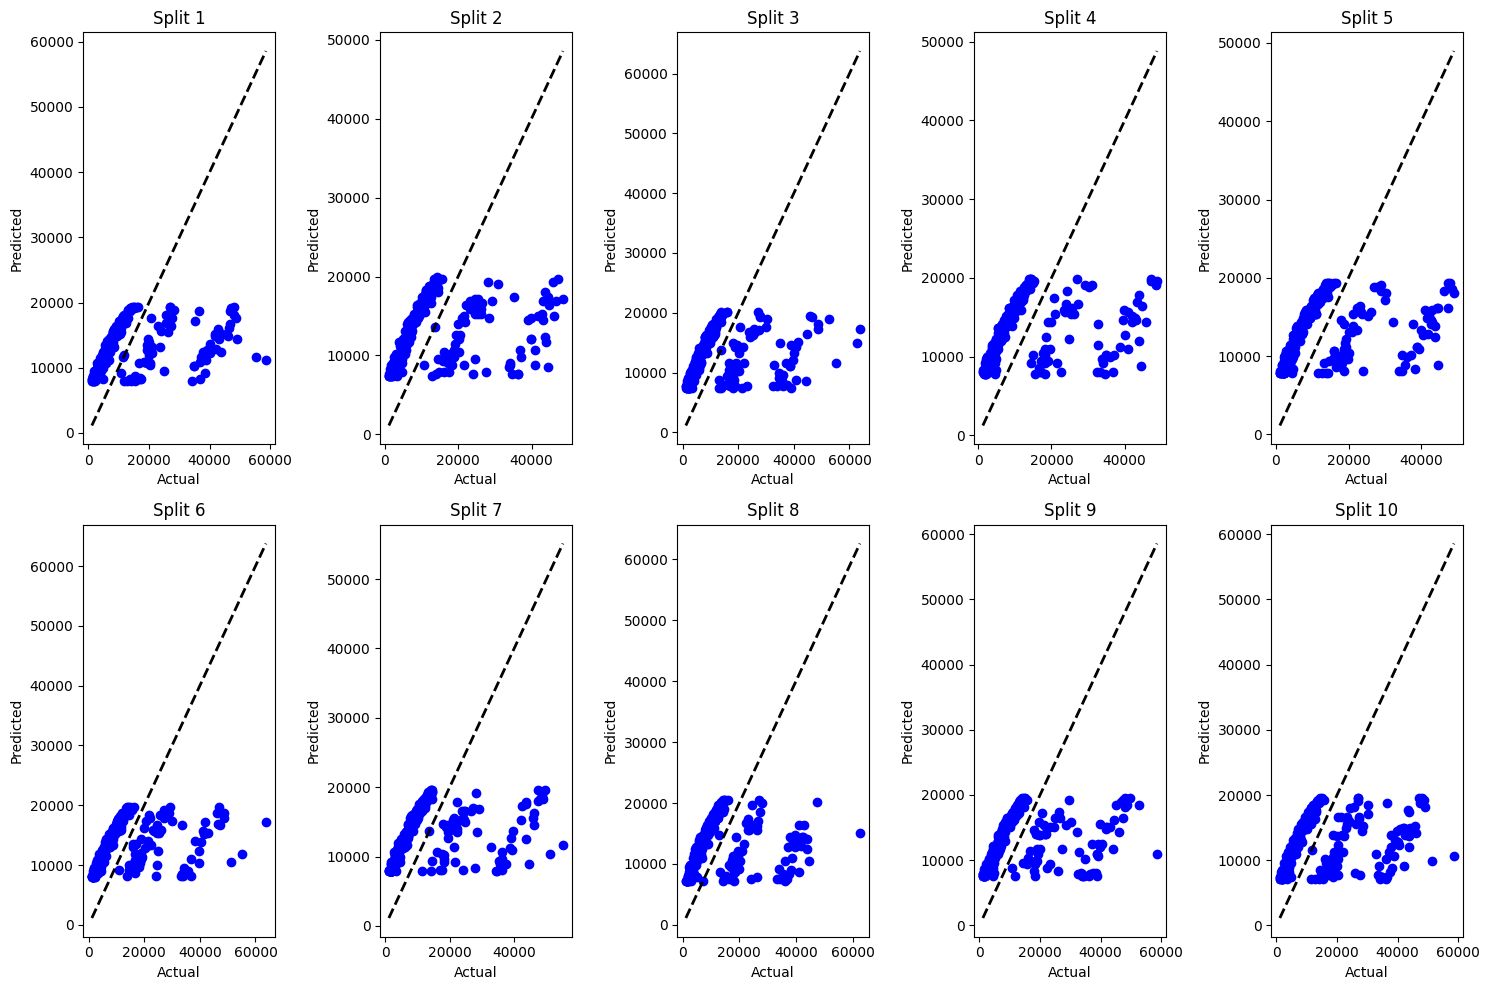

In [ ]:
# Repeated Holdout with Visualization
n_splits = 10
mse_scores = []
r2_scores = []

plt.figure(figsize=(15, 10))

for i in range(n_splits):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_scores.append(mean_squared_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

    # Plotting
    plt.subplot(2, 5, i+1)
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Split {i+1}')

average_mse = np.mean(mse_scores)
average_r2 = np.mean(r2_scores)
print(f'Average MSE from Repeated Holdout: {average_mse}')
print(f'Average R^2 from Repeated Holdout: {average_r2}')

plt.tight_layout()
plt.show()


Average MSE from k-Fold Cross-Validation: 133830159.90807864
Average R^2 from k-Fold Cross-Validation: 0.08527244922492297


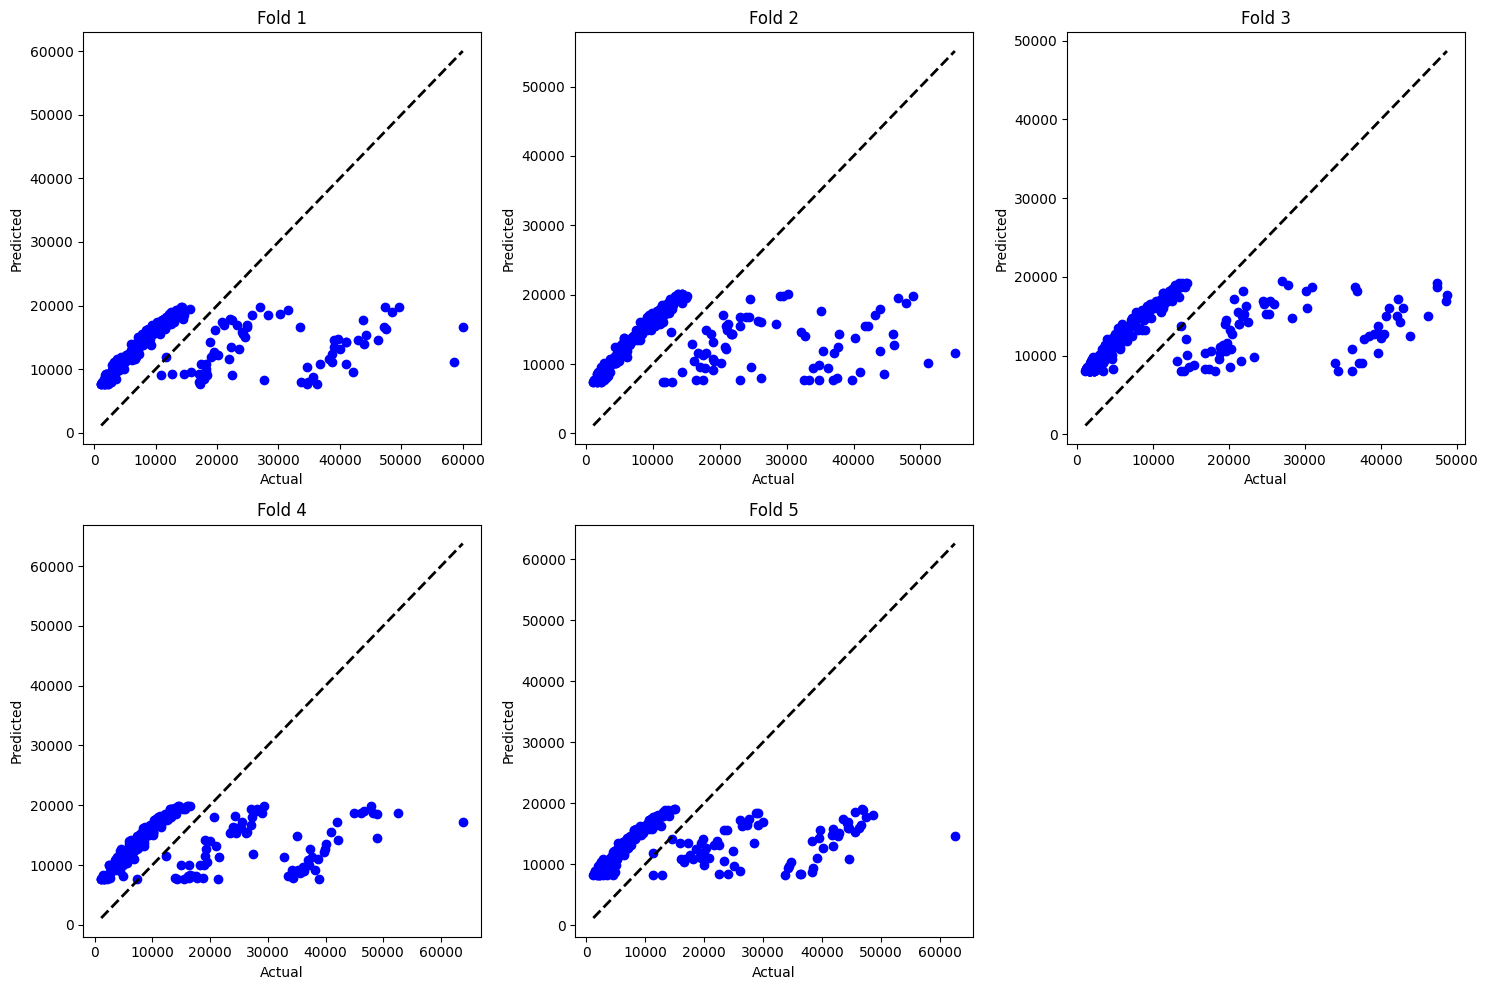

In [ ]:
# k-Fold Cross-Validation with Visualization
kf = KFold(n_splits=5, shuffle=True, random_state=1)
mse_scores = []
r2_scores = []

plt.figure(figsize=(15, 10))

for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_scores.append(mean_squared_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

    # Plotting
    plt.subplot(2, 3, i+1)
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Fold {i+1}')

average_mse = np.mean(mse_scores)
average_r2 = np.mean(r2_scores)
print(f'Average MSE from k-Fold Cross-Validation: {average_mse}')
print(f'Average R^2 from k-Fold Cross-Validation: {average_r2}')

plt.tight_layout()
plt.show()


Average MSE from inbuilt k-Fold Cross-Validation: 133830159.90807864
Average R^2 from inbuilt k-Fold Cross-Validation: 0.08527244922492297


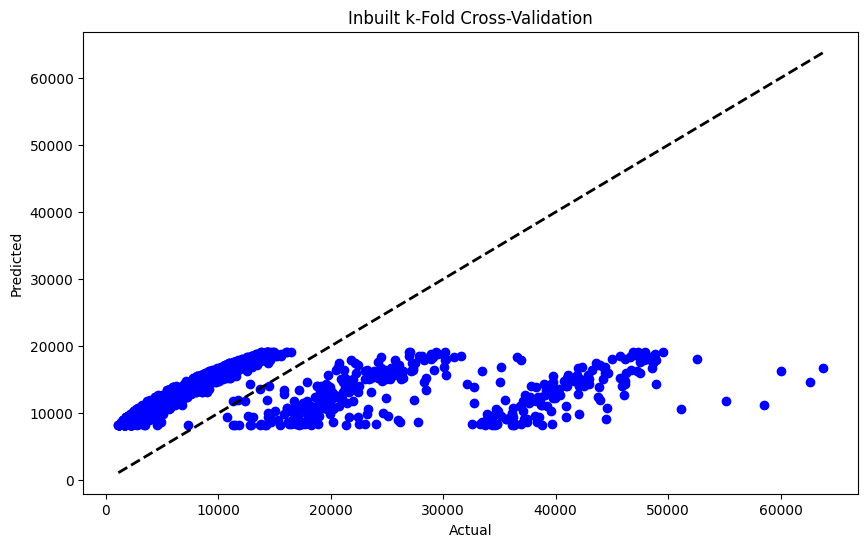

In [ ]:
# Using inbuilt function for k-Fold Cross-Validation with Visualization
kf = KFold(n_splits=5, shuffle=True, random_state=1)
mse_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kf)
r2_scores = cross_val_score(model, X, y, scoring='r2', cv=kf)

mse_scores = -mse_scores  # Convert to positive MSE

average_mse = np.mean(mse_scores)
average_r2 = np.mean(r2_scores)
print(f'Average MSE from inbuilt k-Fold Cross-Validation: {average_mse}')
print(f'Average R^2 from inbuilt k-Fold Cross-Validation: {average_r2}')

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y, model.predict(X), color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Inbuilt k-Fold Cross-Validation')
plt.show()
